## 기존 수강생 코드 중 좋은 성적을 거두었던 모델

- 64 * 2 + 128 * 2 + 256 * 2 + 128 * 2 + 64 * 2로 conv를 구성
- classification을 위한 flatten + dense
- 최종 test accuracy : 0.8318
- 소요 시간 : 9s 212ms/step

In [0]:
%tensorflow_version 2.x
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import shutil

from tensorflow.keras import models, datasets

from google.colab import drive
drive.mount('/content/drive')

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

### 데이터 가져오기

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import zipfile
root_dir = '/content/drive/Shared drives/scsa_2019_a/Project/dataset.zip'
#data_dir = pathlib.Path(root_dir)
#data_dir_cwd = pathlib.Path('/content/sample_data')
# data_list = pathlib.Path('/content/drive/Shared drives/scsa_2019_a/Project/dataset_test').glob('*')
#data_list = pathlib.Path('/content/drive/Shared drives/scsa_2019_a/Project/testset/dataset_raw.zip')
zip_ref = zipfile.ZipFile(root_dir, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()
#drive.mount('/content/drive/')
# for loc in data_list:
#   if loc == '/tmp/tmpwpnw1k1r' : continue 
#   zip_ref = zipfile.ZipFile(loc, 'r')
#   zip_ref.extractall("/tmp3")
#   zip_ref.close()

### 데이터 가져오기

In [0]:
import random

In [0]:
# !rmdir -f /tmp/tmpwpnw1k1r
data_path = '/tmp/dataset_final'

In [0]:
data_dir = pathlib.Path(data_path)

tf.io.gfile.mkdir('/test2/')
test_dir = pathlib.Path('/test2/')
image_count = len(list(data_dir.glob('*/*')))
image_count
sep_test = True
print(image_count)

7399


In [0]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != '└asdfsafdsafsaafsd'])
CLASS_NAMES
print(CLASS_NAMES)

['hoona' 'yoonho' 'hyori' 'jisung' 'bts' 'iu' 'mingi' 'woosung' 'youngae'
 'twice' 'sodam' 'jaeseuk' 'jyp' 'goeun' 'joon' 'yuna']


랜덤한 숫자 뽑기

In [0]:
if sep_test:
  for name in CLASS_NAMES:
    files = list(data_dir.glob(name + '/*'))
    randList = list(range(0, len(list(data_dir.glob(name + '/*')))))

    randList = random.sample(randList, int(len(list(data_dir.glob(name + '/*'))) * 0.2))
    print('/test2/' + name)
    tf.io.gfile.mkdir('/test2/' + name)
    print(randList)
    print(type(str(test_dir)))
    for n in randList:
      filedir = str(files[n])
      #print(name)
      
      print(str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])  

      shutil.move(filedir, str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])


/test2/hoona
[107, 121, 1, 110, 89, 57, 119, 147, 105, 46, 146, 77, 126, 98, 67, 144, 129, 148, 102, 84, 97, 2, 33, 43, 70, 6, 141, 58, 13, 4, 120]
<class 'str'>
/test2/hoona/hoona (18).jpg
/test2/hoona/hoona (12).jpg
/test2/hoona/hoona (124).jpg
/test2/hoona/hoona (131).jpg
/test2/hoona/hoona (16).jpg
/test2/hoona/hoona (126).JPG
/test2/hoona/hoona (133).jpg
/test2/hoona/hoona (127).jpg
/test2/hoona/hoona (94).jpg
/test2/hoona/hoona (116).jpg
/test2/hoona/hoona (8).jpg
/test2/hoona/hoona (151).jpg
/test2/hoona/hoona (155).jpg
/test2/hoona/hoona (142).jpg
/test2/hoona/hoona (63).jpg
/test2/hoona/hoona (99).jpg
/test2/hoona/hoona (102).jpg
/test2/hoona/hoona (17).jpg
/test2/hoona/hoona (9).jpg
/test2/hoona/hoona (38).jpg
/test2/hoona/hoona (107).jpg
/test2/hoona/hoona (66).jpg
/test2/hoona/hoona (55).jpg
/test2/hoona/hoona (33).jpg
/test2/hoona/hoona (89).jpg
/test2/hoona/hoona (105).jpg
/test2/hoona/hoona (84).jpg
/test2/hoona/hoona (3).jpg
/test2/hoona/hoona (34).jpg
/test2/hoona/hoon

In [0]:
!ls /test2

bts    hoona  iu       jisung  jyp    sodam  woosung  youngae
goeun  hyori  jaeseuk  joon    mingi  twice  yoonho   yuna


### image generator 만들기

In [0]:

# image generator for unziped directory 
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = (
    tf.keras.preprocessing.image.ImageDataGenerator(
        #width_shift_range=0.05,
        #height_shift_range=0.05,
        #horizontal_flip=True, 
        #vertical_flip=True,
        #rotation_range=30,
        validation_split=0.1,
        rescale=1./255))

image_generator_cwd = (
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)) # preprocessing이라는 모듈 밑에 이미지를 처리하는 애들이 있고, 그 안에 있음.

In [0]:
BATCH_SIZE = 128
IMG_HEIGHT = 128
IMG_WIDTH = 128
#STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='training'
                      )

test_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='validation'
                      )
final_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=26,
                        shuffle=True,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )


Found 5340 images belonging to 16 classes.
Found 585 images belonging to 16 classes.
Found 1474 images belonging to 16 classes.


In [0]:
def model_cnn_basic():
  model = models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
  model.add(Conv2D(64,3,padding='same',activation='relu'))

  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
  
  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))

  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 4
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  #model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 4
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  #model.add(Conv2D(256, 3, padding='same', activation='relu'))
  #model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # Dense layers
  model.add(Flatten(name='flatten'))
  #model.add(Dense(1024, activation='relu', name='dense_1024'))
  model.add(Dense( len(list(CLASS_NAMES)), activation='softmax', name='dense_10'))

  return model

model_basic = model_cnn_basic()
model_basic.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 63, 63, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 63, 63, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 256)      

In [0]:
model_basic.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
epoch_n = 30

In [0]:
history_basic = model_basic.fit_generator(train_data_gen, 
                        epochs=epoch_n,
                        validation_data=test_data_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 42 steps, validate for 5 steps
Epoch 1/30
42/42 [==============================] - 13s 317ms/step - loss: 2.6787 - acc: 0.1082 - val_loss: 2.5941 - val_acc: 0.1316
Epoch 2/30
42/42 [==============================] - 9s 210ms/step - loss: 2.4426 - acc: 0.1940 - val_loss: 2.3334 - val_acc: 0.2376
Epoch 3/30
42/42 [==============================] - 9s 211ms/step - loss: 2.0584 - acc: 0.3305 - val_loss: 1.8534 - val_acc: 0.3949
Epoch 4/30
42/42 [==============================] - 9s 210ms/step - loss: 1.6548 - acc: 0.4680 - val_loss: 1.5987 - val_acc: 0.4940
Epoch 5/30
42/42 [==============================] - 9s 210ms/step - loss: 1.3319 - acc: 0.5779 - val_loss: 1.2374 - val_acc: 0.5983
Epoch 6/30
42/42 [==============================] - 9s 210ms/step - loss: 1.0574 - acc: 0.6712 - val_loss: 1.0107 - val_acc: 0.6718
Epoch 7/30
42/42 [==============================] - 9s 210ms/step - loss: 0.8516 - acc: 0.7346 - val_loss: 0.9970 - 

## Evaluate

In [0]:
model_basic.evaluate_generator(final_gen, verbose=2)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
57/57 - 2s - loss: 1.1308 - acc: 0.8318


[1.1307607322539155, 0.83175033]

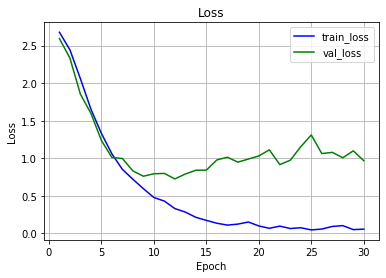

In [0]:
loss = history_basic.history['loss']
epochs = range(1, len(loss)+1)

plt.title('Loss')
plt.plot(epochs, history_basic.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history_basic.history['val_loss'], 'g', label='val_loss')
#plt.ylim([0,0.5])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [0]:
test_accuracy = model_basic.evaluate_generator(test_data_gen, verbose=1)

  ...
    to  
  ['...']
5/5 [==============================] - 0s 97ms/step - loss: 0.9673 - acc: 0.8222


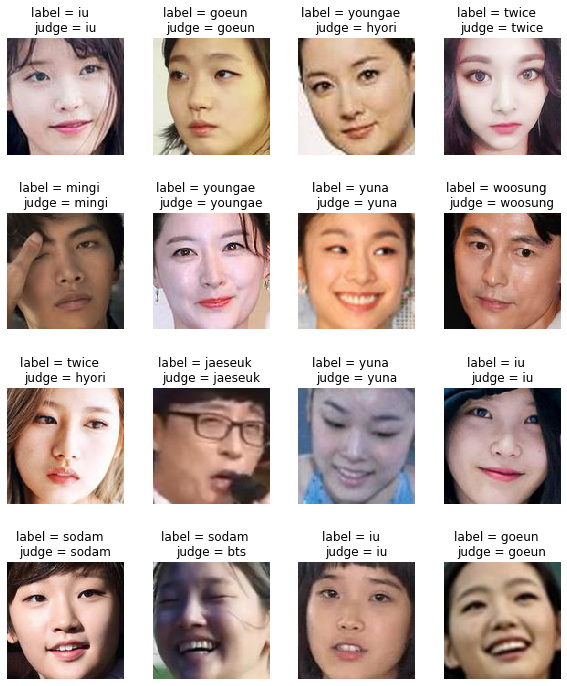

In [0]:
def show_batch(data_gen, class_l):
  # get image and label from data generator
  img_batch, l_batch = next(data_gen) 
  plt.figure(figsize=(10,10))
  ret = []
  img_title = model_basic.predict(img_batch)
  for img in img_title:
    ret.append(np.array(img).argmax())
  for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
    plt.imshow(img_batch[n])
    title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
    plt.title(title_name)
    plt.axis('off')

show_batch(test_data_gen, CLASS_NAMES)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
test_data_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=BATCH_SIZE,
                        shuffle=False,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )

Y_pred = model_basic.predict_generator(test_data_gen, 2210 // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))

Found 1474 images belonging to 16 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[ 27   0   1   0   0   0   1   1   0   0   0   0   0   0   0   1]
 [  0  35   0   3   2   0   3   2   0   1   0   0   0   0   0   2]
 [  0   1  44   1   1   8   0   2   3   7   3   1   0   3   0   1]
 [  0   1   0  23   0   0   2   0   0   0   0   0   1   0   0   1]
 [  0   4   1   0 113   4   2   0   0   1   1   0   0   1   0   1]
 [  0   0   3   0   5 155   0   0   1   3   2   0   0   3   0   5]
 [  1   3   0   0   9   0  88   9   0   2   0   0   0   0   0   1]
 [  1   1   2   0   2   0   3  75   0   1   0   0   0   0   0   1]
 [  0   1   2   0   0   2   0   0  21   5   1   0   0   4   0   2]
 [  0   0   1   0   0   8   0   0   1 142   1   0   1   5   1   5]
 [  0   0   1   3   1   2   0   0   0   1 114   0   0   9   0   1]
 [  0   0   0   2   0   0   1   3   0   0   0  92   0   2   2   1]
 [  2   1   2   1   0   1   1   3   0   0   0   0  41   

In [0]:
CLASS_NAMES

array(['jyp', 'woosung', 'yoonho', 'yuna', 'hoona', 'sodam', 'joon',
       'goeun', 'hyori', 'jisung', 'mingi', 'jaeseuk', 'iu', 'twice',
       'bts', 'youngae'], dtype='<U7')

In [0]:
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=CLASS_NAMES))

Classification Report
              precision    recall  f1-score   support

       hoona       0.87      0.87      0.87        31
      yoonho       0.74      0.73      0.74        48
       hyori       0.75      0.59      0.66        75
      jisung       0.59      0.82      0.69        28
         bts       0.84      0.88      0.86       128
          iu       0.84      0.88      0.86       177
       mingi       0.85      0.78      0.81       113
     woosung       0.79      0.87      0.83        86
     youngae       0.75      0.55      0.64        38
       twice       0.85      0.86      0.86       165
       sodam       0.84      0.86      0.85       132
     jaeseuk       0.99      0.89      0.94       103
         jyp       0.95      0.76      0.85        54
       goeun       0.83      0.84      0.83       177
        joon       0.81      0.94      0.87        31
        yuna       0.77      0.90      0.83        88

    accuracy                           0.83      1474
   m